# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anastasiaaivali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["Rossel", "dem", "d'", "Artevelde", "vend", "Volxem", "rie", "ruo", "Royale", "demande", "avenue", "faire", "premier", "leurs", "aussi", "toute", "quelques","mod", "dit", "faut", "adr", "cette", "après", "dont", "quo","etc", "cet", "ans", "uno", "première", "rua","depuis", "pendant", "dès", "pet","aveo", "ainsi", "vers", "non", "cap"] 
sw = set(sw)

## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [32]:
# Choisir une année
year = 1920

In [33]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1920-04-13_01-00008.txt',
 'KB_JB838_1920-04-21_01-00002.txt',
 'KB_JB838_1920-06-07_01-00006.txt',
 'KB_JB838_1920-05-28_01-00008.txt',
 'KB_JB838_1920-06-24_01-00004.txt',
 'KB_JB838_1920-01-13_01-00005.txt',
 'KB_JB838_1920-09-26_01-00009.txt',
 'KB_JB838_1920-08-19_01-00001.txt',
 'KB_JB838_1920-12-02_01-00003.txt',
 'KB_JB838_1920-02-08_01-00010.txt',
 'KB_JB838_1920-09-22_01-00003.txt',
 'KB_JB838_1920-09-12_01-00007.txt',
 'KB_JB838_1920-02-08_01-00005.txt',
 'KB_JB838_1920-07-19_01-00004.txt',
 'KB_JB838_1920-03-11_01-00004.txt',
 'KB_JB838_1920-12-11_01-00003.txt',
 'KB_JB838_1920-04-17_01-00007.txt',
 'KB_JB838_1920-03-17_01-00001.txt',
 'KB_JB838_1920-10-31_01-00003.txt',
 'KB_JB838_1920-10-16_01-00008.txt',
 'KB_JB838_1920-04-27_01-00001.txt',
 'KB_JB838_1920-12-09_01-00001.txt',
 'KB_JB838_1920-03-08_01-00001.txt',
 'KB_JB838_1920-05-26_01-00004.txt',
 'KB_JB838_1920-07-12_01-00001.txt',
 'KB_JB838_1920-05-10_01-00006.txt',
 'KB_JB838_1920-02-10_01-00002.txt',
 

In [34]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [35]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [37]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'FOIRE COMMERCIALE Pero às SSrux&ilas Staad 32© Mesdames, passez au Stand du BLEU DESIREE DELEGUE POUR l.A VENTE EN OEUSIOUE: DUFOUR, 1(50, boulev. AN6PAQH, BRUXELLES Un sachet de BLEU OUTREMER DESTRÉE'

In [38]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [40]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"FOIRE COMMERCIALE Pero às SSrux&ilas Staad 32© Mesdames, passez au Stand du BLEU DESIREE DELEGUE POUR l.A VENTE EN OEUSIOUE: DUFOUR, 1(50, boulev. AN6PAQH, BRUXELLES Un sachet de BLEU OUTREMER DESTRÉE FOIRE COMMERCIAIE vous sera offert GRACIEUSEMENT. Pare de Bruxelles Stand 329 Glaces Glaças cliln's, myontéce, : d» tontes iliroeitflon» sont aibi't r.<ix t-.rCIfur. nr|x. I<risa fe doiuictle, R'adre». nar écrit ! LeAu. 123. rue Charles I>s -Vift.r, üJ. il Buselk'. Ü795 0S6AS. &c.lou sae-araLo état"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [41]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [42]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1920_clean.txt!'

In [43]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:300]

'foire commerciale pero ssrux ilas staad mesdames passez stand bleu desiree delegue vente oeusioue dufour boulev bruxelles sachet bleu outremer destrée foire commerciaie offert gracieusement pare bruxelles stand glaces glaças cliln myontéce tontes iliroeitflon aibi rcifur risa doiuictle adre nar écri'

## Nuage de mots

### Afficher les termes les plus fréquents


In [44]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rue', 3721), ('bruxelles', 1432), ('plus', 1355), ('prix', 1227), ('maison', 1122), ('tout', 1077), ('bon', 1023), ('vendre', 850), ('tous', 711), ('bien', 684)]


### Créer, stocker et afficher le nuage de mots

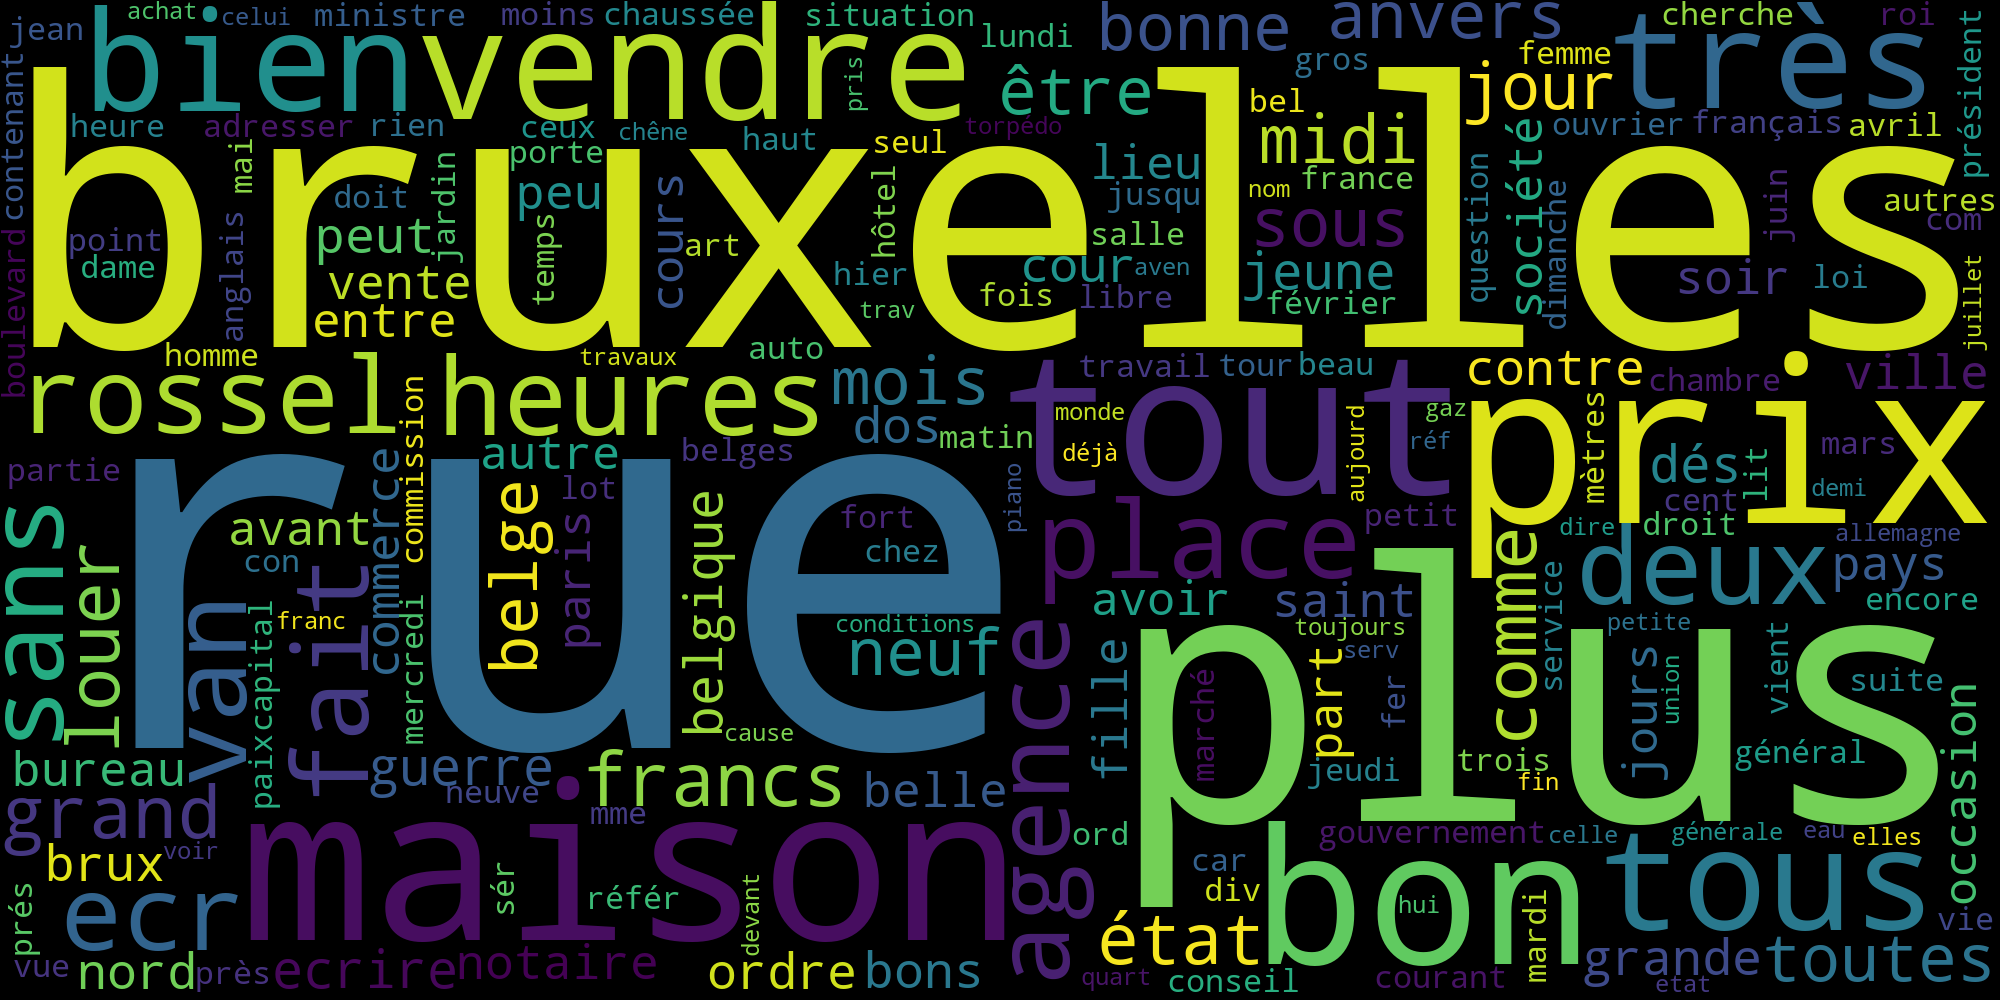

In [45]:
cloud = WordCloud(width=2000, height=1000, background_color='black').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))